# Heart disease project 
* 
* 
* 
 

***
#### Brief description before processing: 
The dataset consists of 319,795 rows and 18 columns, in which variables are as follows (included from the dataset): 
* **HeartDisease**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* **BMI**: Body Mass Index (BMI)
* **Smoking**: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* **AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* **Stroke**: (Ever told) (you had) a stroke?
* **PhysicalHealth**: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
* **MentalHealth**: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
* **DiffWalking**: Do you have serious difficulty walking or climbing stairs?
* **Sex**: Are you male or female?
* **AgeCategory**: Fourteen-level age category
* **Race**: Imputed race/ethnicity value
* **Diabetic**: (Ever told) (you had) diabetes?
* **PhysicalActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* **GenHealth**: Would you say that in general your health is...
* **SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?
* **Asthma**: (Ever told) (you had) asthma?
* **KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* **SkinCancer**: (Ever told) (you had) skin cancer?
***

### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import ipywidgets as widgets

pd.options.display.float_format = '{:.1f}'.format


### Read file

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.3,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.6,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.2,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.7,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(df.shape)

(319795, 18)


### Set theme

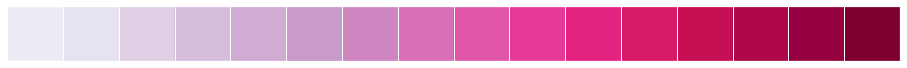

In [4]:
sns.set_theme()
sns.set_palette('PuRd', 14)
pal2=sns.color_palette('PuRd', 2)
pal6=sns.color_palette('PuRd', 6)
pal3=sns.color_palette('PuRd', 3)
sns.palplot(sns.color_palette('PuRd', 16))

### Pre-process data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

*Dataset is cleaned.*

In [8]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
           print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

HeartDisease: ['No' 'Yes']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


#### Replace categorical values (eg: Yes or No) to numerical values (1 or 0)

In [9]:
df = df.replace(['Yes','No'],[1,0])
df = df.replace(['Yes (during pregnancy)','No, borderline diabetes'],[1,0])
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.3,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.6,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.2,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.7,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [10]:
df = df.replace(['Male','Female'],[1,0])
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.3,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.6,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.2,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.7,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [11]:
df = df.replace(['Excellent','Very good', 'Good', 'Fair', 'Poor'],[5,4,3,2,1])
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,0,3.0,30.0,0,0,55-59,White,1,1,4,5.0,1,0,1
1,0,20.3,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,4,7.0,0,0,0
2,0,26.6,1,0,0,20.0,30.0,0,1,65-69,White,1,1,2,8.0,1,0,0
3,0,24.2,0,0,0,0.0,0.0,0,0,75-79,White,0,0,3,6.0,0,0,1
4,0,23.7,0,0,0,28.0,0.0,1,0,40-44,White,0,1,4,8.0,0,0,0


In [12]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
           print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']


### Analyze

In [13]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0,319795,319795,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0,319795.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65-69,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34151,245212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.1,28.3,0.4,0.1,0.0,3.4,3.9,0.1,0.5,NaN,NaN,0.1,0.8,3.6,7.1,0.1,0.0,0.1
std,0.3,6.4,0.5,0.3,0.2,8.0,8.0,0.3,0.5,NaN,NaN,0.3,0.4,1.0,1.4,0.3,0.2,0.3
min,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0
25%,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,3.0,6.0,0.0,0.0,0.0
50%,0.0,27.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,4.0,7.0,0.0,0.0,0.0
75%,0.0,31.4,1.0,0.0,0.0,2.0,3.0,0.0,1.0,NaN,NaN,0.0,1.0,4.0,8.0,0.0,0.0,0.0


#### Create Widget

In [14]:
select = widgets.Dropdown(
    options=['HeartDisease', 'Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer'],
    value='HeartDisease',
    description='Select:',
    disabled=False,
)
select

Dropdown(description='Select:', options=('HeartDisease', 'Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'Ski…

**Bar chart - People getting heart disease**

In [15]:
df['AgeCategory'] = df['AgeCategory'].astype('category')

def age_bar(N):
    df1 = df[df[N] == 1].groupby(['AgeCategory', 'Sex']).size().unstack('AgeCategory').T.reset_index()
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16, 6))
    fig.subplots_adjust(wspace=0.0025, hspace=0.0025)
    fig.suptitle(f'NUMBER OF PEOPLE GETTING \n{N}', size=16, y=1, fontweight="bold")
    
    axes[0].barh(df1['AgeCategory'], df1[1], align='center', color=pal6[1], alpha=.75)
    axes[0].set(title='Males')
    axes[1].barh(df1['AgeCategory'], df1[0], align='center', color=pal3[2], alpha=.75)
    axes[1].set(title='Females')
    
    axes[1].grid(True)
    axes[0].invert_xaxis()
    axes[0].grid(True)
    
    plt.show()
    
viz1 = widgets.interactive(age_bar,N=select)
display(viz1)

interactive(children=(Dropdown(description='Select:', options=('HeartDisease', 'Stroke', 'Diabetic', 'Asthma',…

- Males tend to get heart disease more than females.
- People getting older are more easily at risk of heart disease.
- Numbers of people having asthma disease are equally distributed in different group of age.

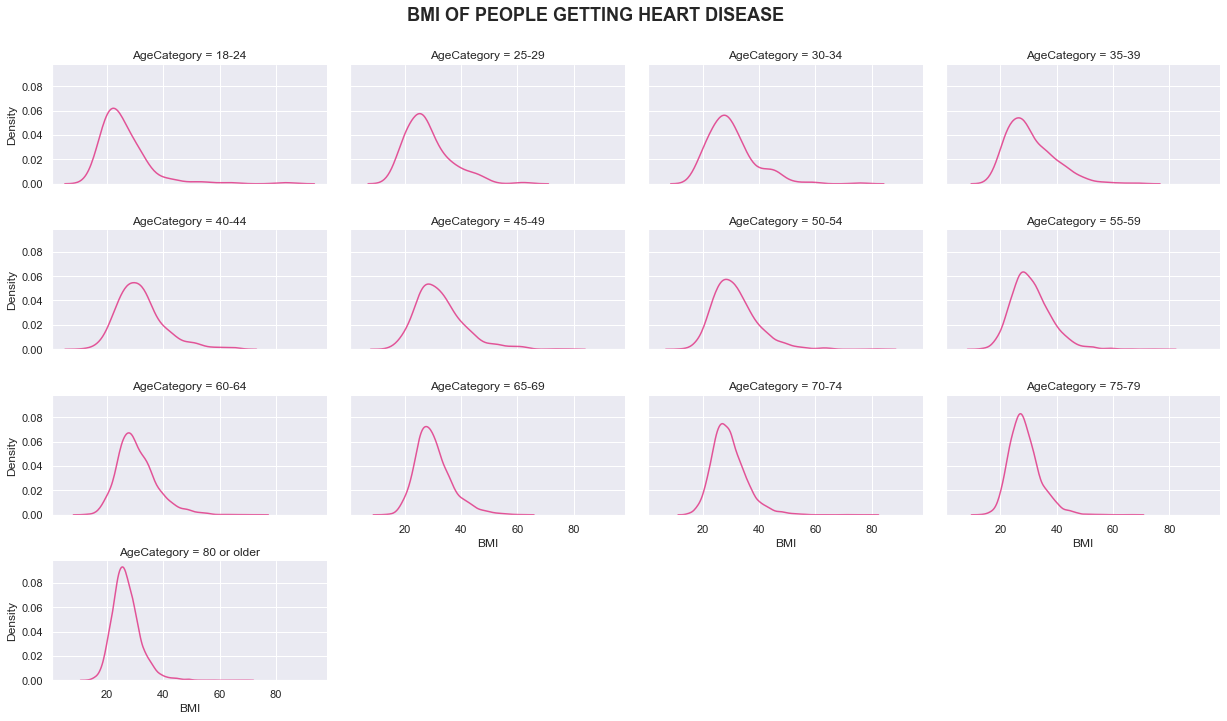

In [16]:
testBMI = df.loc[df['HeartDisease'] == 1, ['AgeCategory', 'BMI']].reset_index(drop=True)

g = sns.FacetGrid(testBMI, col="AgeCategory", height=2.5, col_wrap=4)
g.fig.suptitle('BMI OF PEOPLE GETTING HEART DISEASE', size=18, y=1, fontweight="bold")

g.map(sns.kdeplot, "BMI", color=pal2[1], alpha=.75)

for ax in g.axes.flat:
    ax.figure.set_size_inches(18,10)

- BMI is around 25 - 27.
- BMI of younger people is less than that of older people.

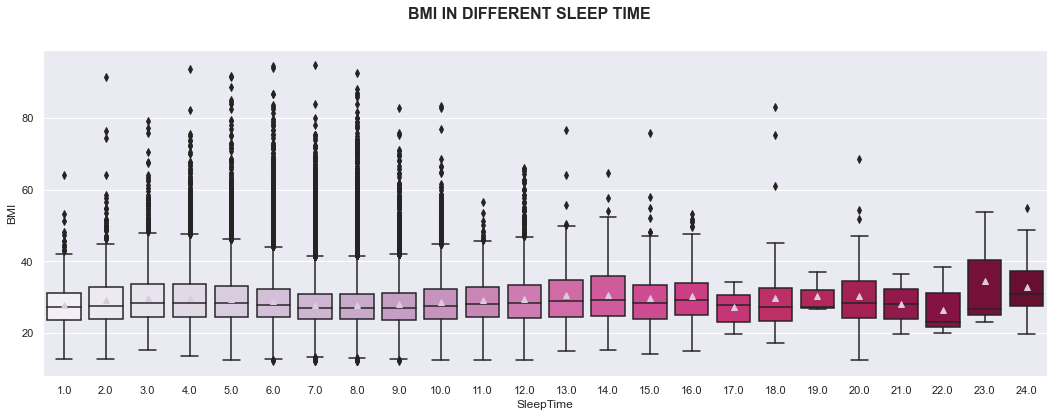

Distribution of Sleep Time of people having BMI in range 18-25


,8.0,7.0,6.0,9.0,5.0,10.0,4.0,12.0,3.0,2.0,...,16.0,15.0,18.0,13.0,20.0,17.0,24.0,22.0,23.0,21.0
SleepTime,31058,30527,17636,5131,4721,2207,1896,586,509,231,...,58,55,31,21,16,6,5,5,1,1


In [17]:
fig, axes = plt.subplots(figsize=(18, 6))
fig.suptitle('BMI IN DIFFERENT SLEEP TIME', size=16, fontweight="bold")

ax = sns.boxplot(data=df, x='SleepTime', y='BMI', showmeans=True, palette=sns.color_palette('PuRd', 24))
plt.show()

# test BMI in range 18.5 - 24.9
BMI_range_test = df[(df['BMI'] > 18.5) & (df['BMI'] < 24.9)]['SleepTime'].value_counts().to_frame().sort_values('SleepTime', ascending=False).T

print('Distribution of Sleep Time of people having BMI in range 18-25')
display(BMI_range_test)

- People generally have BMI more than 25.
- Testing on data of people having healthy BMI range (18.5-24.9) show 8-hour sleep has the highest density.

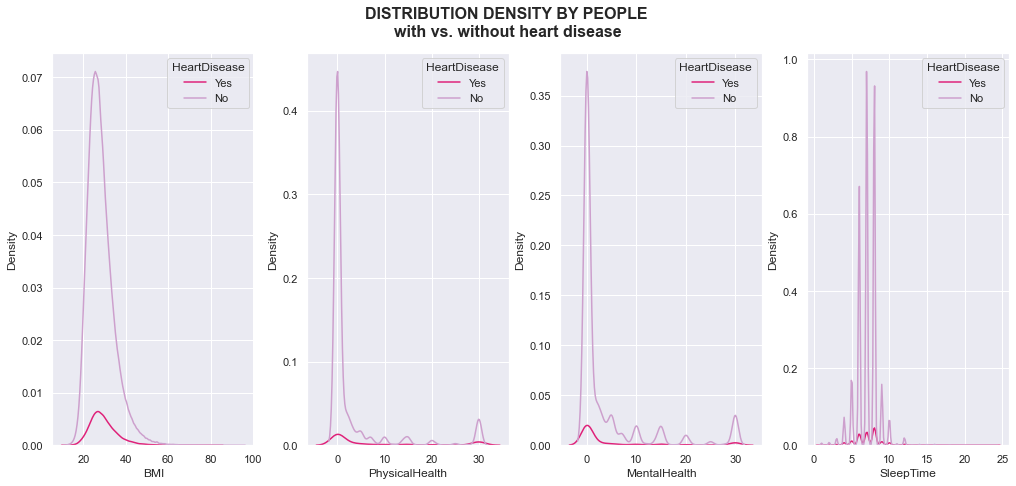

In [18]:
kdep_df = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
#kdep_df
fig = plt.figure(figsize =(14,6), constrained_layout=True)
fig.suptitle('DISTRIBUTION DENSITY BY PEOPLE \nwith vs. without heart disease', size=16, y=1.1, fontweight="bold")

for idx, val in enumerate(kdep_df):
    ax = fig.add_subplot(1,4,idx+1)
    ax = sns.kdeplot(x=val, data=kdep_df, hue=df['HeartDisease'], palette=pal2)
    ax.legend(['Yes', 'No'], title='HeartDisease')


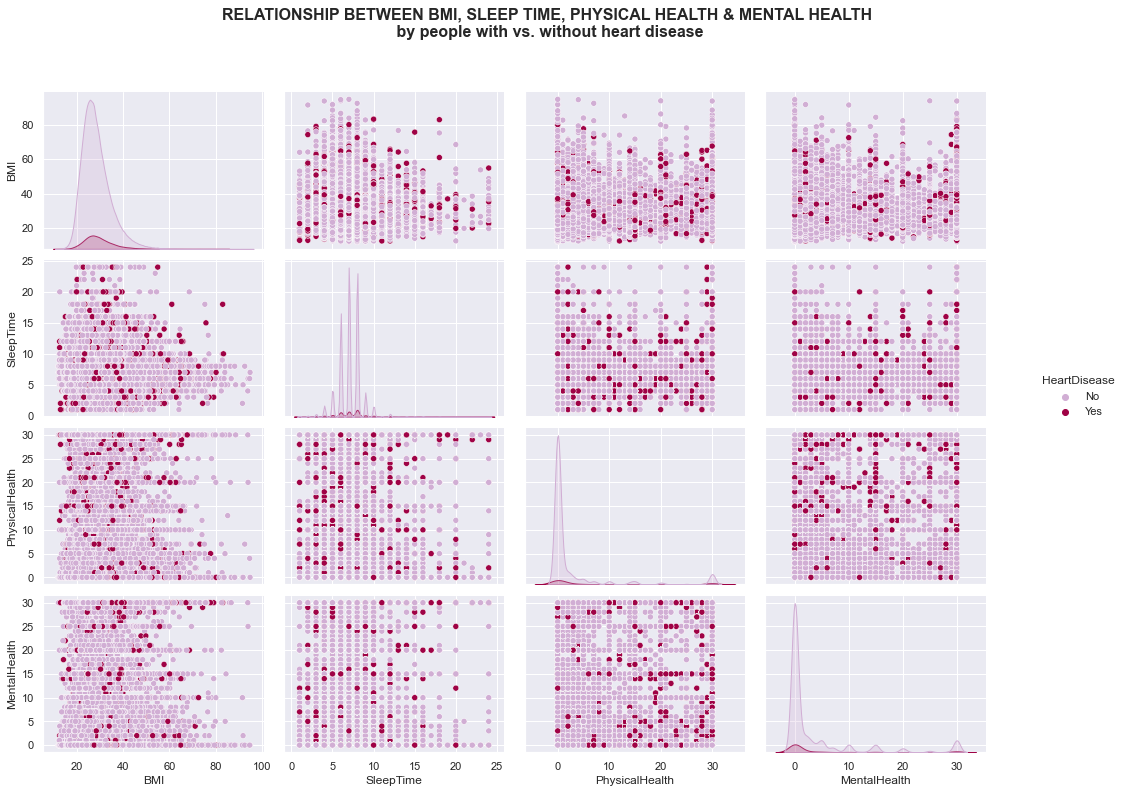

In [19]:
g = sns.pairplot(df, hue='HeartDisease', vars=['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth'], palette=pal6[1:6:4])
g.fig.suptitle('RELATIONSHIP BETWEEN BMI, SLEEP TIME, PHYSICAL HEALTH & MENTAL HEALTH\n by people with vs. without heart disease', size=16, y=1.1, fontweight="bold")

for t, l in zip(g._legend.texts, ['No', 'Yes']):
    t.set_text(l)

for ax in g.axes.flat:
    ax.figure.set_size_inches(16,10)

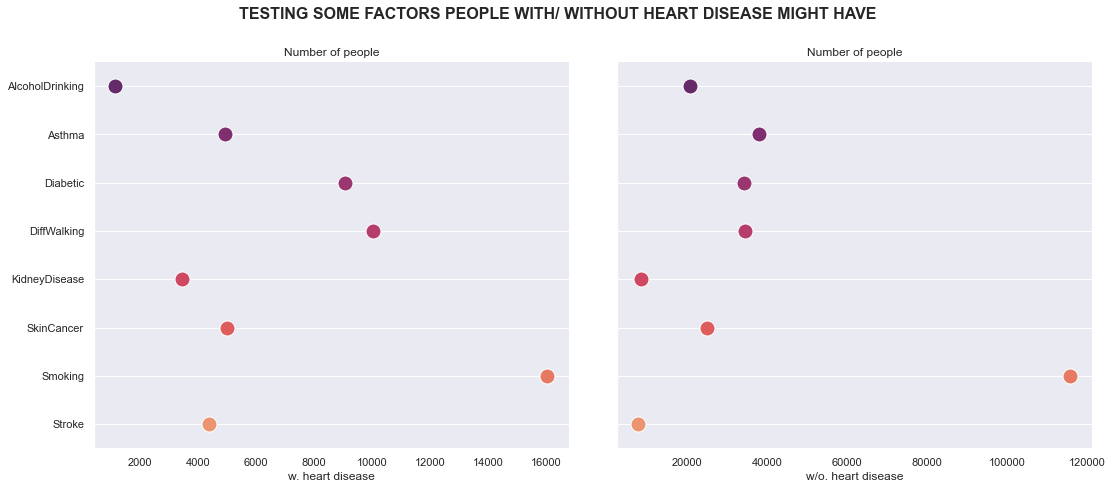

In [20]:
factor_df = df[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']]

appended_data = []

for val in factor_df:
    new_df = df.groupby('HeartDisease')[val].apply(lambda x: (x==1).sum()).reset_index(name='count')
    index = pd.MultiIndex.from_product([[val], ['w/o. heart disease','w. heart disease']])
    data = pd.Series(new_df['count'].tolist(), index=index)
    data.index.names = ['Category', 'HeartDisease']
    appended_data.append(data)
    
appended_data = pd.concat(appended_data).unstack().reset_index()

g = sns.PairGrid(appended_data, x_vars=appended_data.columns[1:], y_vars=['Category'],
                height=8, aspect=0.45,
                hue='Category',
                palette='flare_r')
g.map(sns.stripplot, size=15, orient='h', jitter=False, linewidth=1, edgecolor='w')
g.fig.suptitle('TESTING SOME FACTORS PEOPLE WITH/ WITHOUT HEART DISEASE MIGHT HAVE', size=16, y=1.1, fontweight="bold")
g.set(ylabel="")

for ax in g.axes.flat:
    ax.figure.set_size_inches(16,6)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.set_title('Number of people')

- Regardless of whether people have heart disease or not, the number of smokers is still the highest.
- DiffWalking and Diabetic are remarkable factors of people with heart disease. It needs further testings to exam.

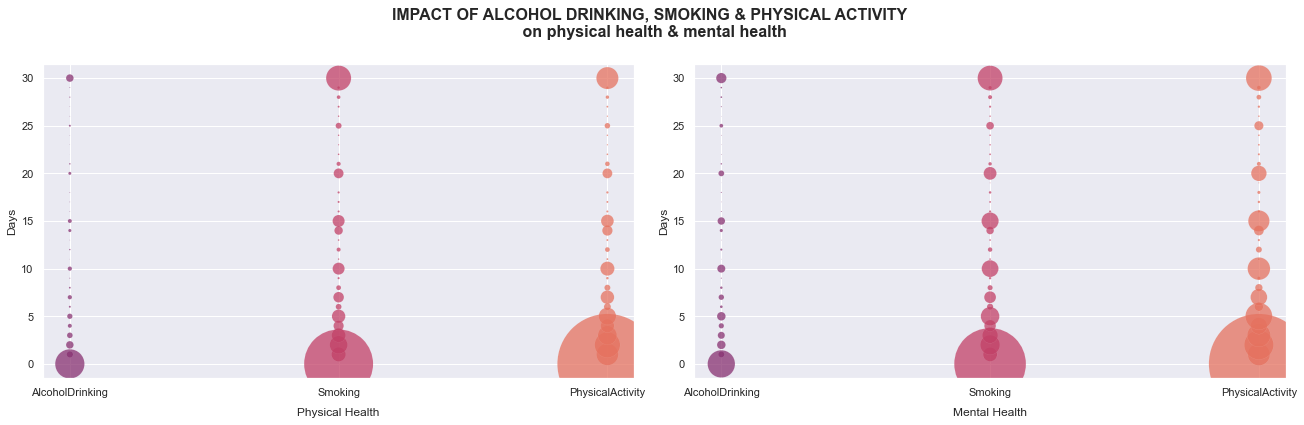

In [21]:
list = ['AlcoholDrinking', 'Smoking', 'PhysicalActivity']
physical, mental = ([] for i in range(2))

for i in list:
    habit_1 = df[df[i] == 1]['PhysicalHealth'].value_counts().reset_index().rename({'index': 'Days', 'PhysicalHealth': i}, axis=1).sort_values('Days')
    habit_2 = df[df[i] == 1]['MentalHealth'].value_counts().reset_index().rename({'index': 'Days', 'MentalHealth': i}, axis=1).sort_values('Days')
    physical.append(habit_1)
    mental.append(habit_2)
    
physical = [df.set_index('Days') for df in physical]
physical = physical[0].join(physical[1:]).unstack().reset_index()
physical.rename({'level_0': 'Habit', 0: 'Count'}, axis=1, inplace=True)
size1 = 10000*physical['Count']/physical['Count'].max()

mental = [df.set_index('Days') for df in mental]
mental = mental[0].join(mental[1:]).unstack().reset_index()
mental.rename({'level_0': 'Habit', 0: 'Count'}, axis=1, inplace=True)
size2 = 10000*mental['Count']/mental['Count'].max()

fig = plt.figure(figsize =(18,5), constrained_layout=True)
fig.suptitle('IMPACT OF ALCOHOL DRINKING, SMOKING & PHYSICAL ACTIVITY \n on physical health & mental health', size=16, y=1.15, fontweight="bold")

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.scatterplot(x='Habit', y='Days', data=physical, hue='Habit', palette='flare_r', s=size1, alpha=.75, legend=None)
ax1.set_xlabel("Physical Health", size=12, labelpad = 10)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot(x='Habit', y='Days', data=mental, hue='Habit', palette='flare_r', s=size2, alpha=.75, legend=None)
ax2.set_xlabel("Mental Health", size=12, labelpad = 10)
plt.show()

- The number of days people (with alcohol drinking, smoking, exercising) have mental or physical health problems is reduced. 
- It is more obvious for those who have a habit of alcohol consumptions.

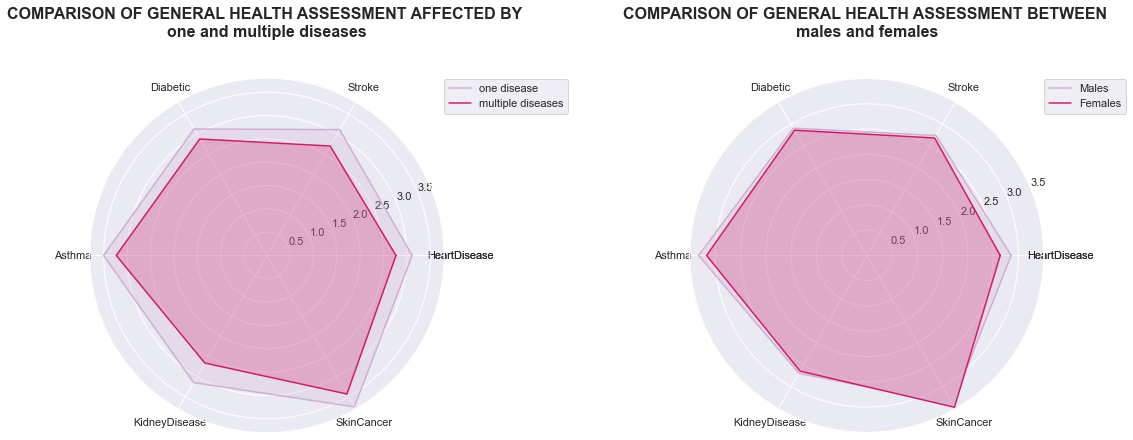

In [22]:
disease = ['HeartDisease', 'Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']
healthrate_byone, healthrate_byall, healthrate_bysex = ([] for i in range(3))

for i in disease:
    mean_byone = df[(df[disease][i] == 1) & (df[disease].drop(i, axis=1) == 0).all(1)]['GenHealth'].mean()
    mean_byall = df[df[i] == 1]['GenHealth'].mean()
    mean_bysex = df[df[i] == 1].groupby('Sex')['GenHealth'].mean().reset_index(name=i)
    
    healthrate_byone.append(mean_byone)
    healthrate_byall.append(mean_byall)
    healthrate_bysex.append(mean_bysex)

rate_byone = pd.DataFrame({'Disease': disease, 'HealthRates by one disease': healthrate_byone})
rate_byall = pd.DataFrame({'Disease': disease, 'HealthRates by multiple diseases': healthrate_byall})
rates_df = rate_byone.merge(rate_byall, on='Disease')

healthrate_bysex = [df.set_index('Sex') for df in healthrate_bysex]
healthrate_bysex = healthrate_bysex[0].join(healthrate_bysex[1:]).T

# create fig
fig = plt.figure(figsize =(16,6), constrained_layout=True)

# add ax1 
categories = rates_df['Disease']
categories = [*categories, categories[0]]

rate_1 = rates_df['HealthRates by one disease']
rate_2 = rates_df['HealthRates by multiple diseases']

rate_1 = [*rate_1, rate_1[0]]
rate_2 = [*rate_2, rate_2[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(rate_1))

ax1 = fig.add_subplot(1,2,1, projection='polar')
ax1.plot(label_loc, rate_1, label='one disease', color=pal6[1])
ax1.fill(label_loc, rate_1, facecolor=pal6[1], alpha=0.25)
ax1.plot(label_loc, rate_2, label='multiple diseases', color=pal6[4])
ax1.fill(label_loc, rate_2, facecolor=pal6[4], alpha=0.25)

plt.title('COMPARISON OF GENERAL HEALTH ASSESSMENT AFFECTED BY \none and multiple diseases', size=16, y=1.1, fontweight="bold")
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=[1, 0.9])

#add ax2
rate_male = healthrate_bysex[1]
rate_female = healthrate_bysex[0]
rate_male = [*rate_male, rate_male[0]]
rate_female = [*rate_female, rate_female[0]]

ax2 = fig.add_subplot(1,2,2, projection='polar')
ax2.plot(label_loc, rate_male, label='Males', color=pal6[1])
ax2.fill(label_loc, rate_male, facecolor=pal6[1], alpha=0.25)
ax2.plot(label_loc, rate_female, label='Females', color=pal6[4])
ax2.fill(label_loc, rate_female, facecolor=pal6[4], alpha=0.25)

plt.title('COMPARISON OF GENERAL HEALTH ASSESSMENT BETWEEN \nmales and females', size=16, y=1.1, fontweight="bold")
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=[1, 0.9])
plt.show()


- People have skin cancer or asthama tend to rate their health conditions higher than those with other diseases.
- Health rating from men is higher than that from women.